Train shape: (20631, 26), Test shape: (13096, 26)

Training data with RUL:
   unit  time    op_1    op_2   op_3  sensor_1  sensor_2  sensor_3  sensor_4  \
0     1     1 -0.0007 -0.0004  100.0    518.67    641.82   1589.70   1400.60   
1     1     2  0.0019 -0.0003  100.0    518.67    642.15   1591.82   1403.14   
2     1     3 -0.0043  0.0003  100.0    518.67    642.35   1587.99   1404.20   
3     1     4  0.0007  0.0000  100.0    518.67    642.35   1582.79   1401.87   
4     1     5 -0.0019 -0.0002  100.0    518.67    642.37   1582.85   1406.22   

   sensor_5  ...  sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  \
0     14.62  ...    2388.02    8138.62     8.4195       0.03        392   
1     14.62  ...    2388.07    8131.49     8.4318       0.03        392   
2     14.62  ...    2388.03    8133.23     8.4178       0.03        390   
3     14.62  ...    2388.08    8133.83     8.3682       0.03        392   
4     14.62  ...    2388.04    8133.80     8.4294       0.03        3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        22,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,233 (137.63 KB)

 Trainable params: 35,233 (137.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 10790.4883 - val_loss: 13608.4541
Epoch 2/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 9122.5938 - val_loss: 12346.1436
Epoch 3/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 8120.6587 - val_loss: 11262.3320
Epoch 4/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 7119.1797 - val_loss: 10319.5244
Epoch 5/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 6461.0542 - val_loss: 9498.9150
Epoch 6/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 5939.1562 - val_loss: 8789.9980
Epoch 7/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 5319.2949 - val_loss: 8180.4722
Epoch 8/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 4894.5166 - val_loss: 7657.3184
Epoch 9/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 4619.8306 - val_loss: 7212.4502
Epoch 10/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 4350.8638 - val_loss: 6843.1045
Epoch 11/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - l

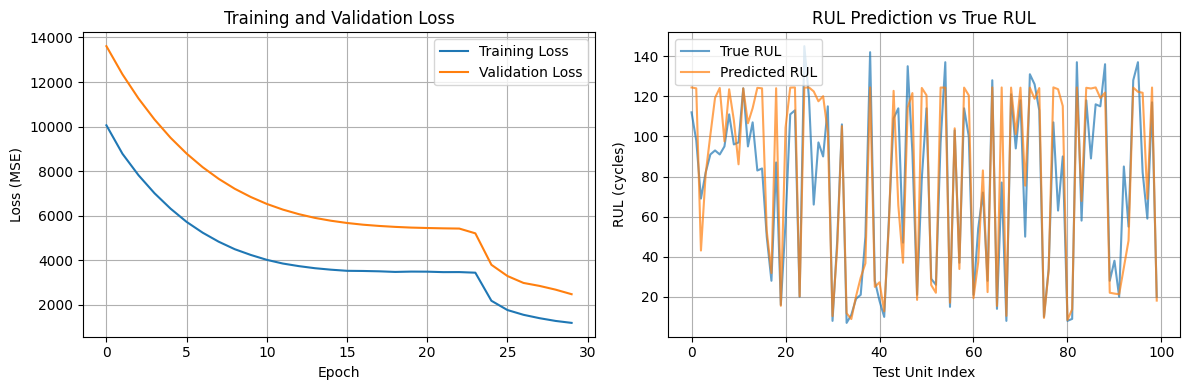

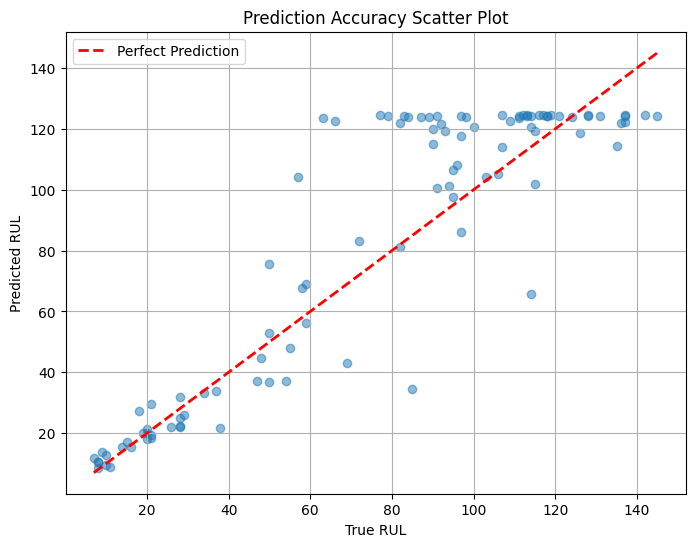

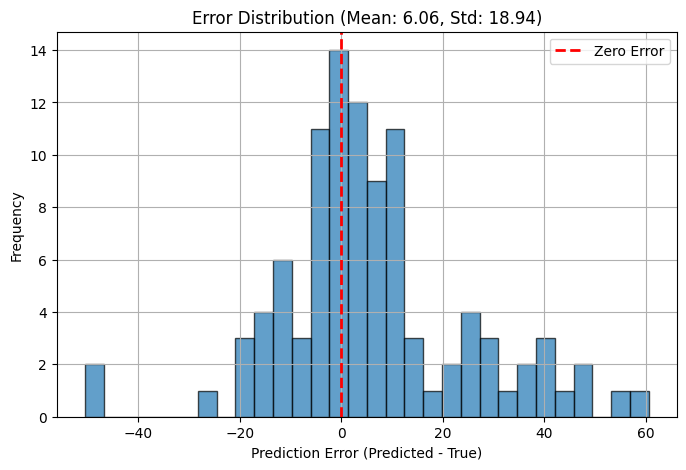

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# ============================================================================
# 1. DATA LOADING
# ============================================================================
train_df = pd.read_csv("train_FD001.txt", sep=" ", header=None)
train_df.dropna(axis=1, inplace=True)

test_df = pd.read_csv("test_FD001.txt", sep=" ", header=None)
test_df.dropna(axis=1, inplace=True)

rul_df = pd.read_csv("RUL_FD001.txt", sep=" ", header=None)
rul_df.dropna(axis=1, inplace=True)

# Assign column names
columns = ["unit", "time"] + [f"op_{i}" for i in range(1,4)] + [f"sensor_{i}" for i in range(1,22)]
train_df.columns = columns
test_df.columns = columns

print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")

# ============================================================================
# 2. CREATE RUL FOR TRAINING DATA
# ============================================================================
def create_rul(df):
    rul = df.groupby("unit")["time"].max().reset_index()
    rul.columns = ["unit", "max_time"]
    df = df.merge(rul, on="unit")
    df["RUL"] = df["max_time"] - df["time"]
    df.drop("max_time", axis=1, inplace=True)
    return df

train_df = create_rul(train_df)
print("\nTraining data with RUL:")
print(train_df.head())

# ============================================================================
# 3. FEATURE SCALING
# ============================================================================
feature_cols = [col for col in train_df.columns if col not in ["unit", "time", "RUL"]]
scaler = MinMaxScaler()
train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
test_df[feature_cols] = scaler.transform(test_df[feature_cols])

print(f"\nNumber of features: {len(feature_cols)}")

# ============================================================================
# 4. SEQUENCE GENERATION
# ============================================================================
def generate_sequences(df, window=30):
    """Generate sequences for LSTM training"""
    X, y = [], []
    for unit in df["unit"].unique():
        unit_df = df[df["unit"] == unit]
        for i in range(len(unit_df) - window):
            X.append(unit_df[feature_cols].iloc[i:i+window].values)
            y.append(unit_df["RUL"].iloc[i+window])
    return np.array(X), np.array(y)

# Create training sequences
window_size = 30
X_train, y_train = generate_sequences(train_df, window=window_size)
print(f"\nTraining sequences shape: X={X_train.shape}, y={y_train.shape}")

# ============================================================================
# 5. BUILD LSTM MODEL
# ============================================================================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# ============================================================================
# 6. TRAIN MODEL
# ============================================================================
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ============================================================================
# 7. PREPARE TEST DATA (MISSING FUNCTION)
# ============================================================================
def prepare_test_data(test_df, window=30):
    """
    Prepare test data by taking the last 'window' timesteps for each unit.
    This represents the most recent sensor readings before failure prediction.
    """
    X_test = []
    for unit in test_df["unit"].unique():
        unit_df = test_df[test_df["unit"] == unit]
        # Take the last 'window' rows for this unit
        if len(unit_df) >= window:
            X_test.append(unit_df[feature_cols].iloc[-window:].values)
        else:
            # If unit has fewer than 'window' rows, pad with zeros
            padded = np.zeros((window, len(feature_cols)))
            padded[-len(unit_df):] = unit_df[feature_cols].values
            X_test.append(padded)
    return np.array(X_test)

# ============================================================================
# 8. EVALUATE MODEL
# ============================================================================
X_test = prepare_test_data(test_df, window=window_size)
predictions = model.predict(X_test).reshape(-1)

# Get true RUL values
true_rul = rul_df[0].values

# Ensure same length
min_len = min(len(true_rul), len(predictions))
true_rul = true_rul[:min_len]
predictions = predictions[:min_len]

print(f"\nBefore NaN cleaning:")
print(f"len(true_rul): {len(true_rul)}")
print(f"len(predictions): {len(predictions)}")

# Remove NaN values
mask = (~np.isnan(true_rul)) & (~np.isnan(predictions))
true_rul_clean = true_rul[mask]
predictions_clean = predictions[mask]

print(f"\nAfter NaN cleaning:")
print(f"len(true_rul_clean): {len(true_rul_clean)}")
print(f"len(predictions_clean): {len(predictions_clean)}")

# Calculate metrics
if len(true_rul_clean) == 0:
    raise ValueError("No valid samples left after removing NaNs.")

rmse = math.sqrt(mean_squared_error(true_rul_clean, predictions_clean))
mae = mean_absolute_error(true_rul_clean, predictions_clean)

print(f"\n{'='*50}")
print(f"MODEL PERFORMANCE")
print(f"{'='*50}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Predictions count: {len(predictions_clean)}")
print(f"True RUL count: {len(true_rul_clean)}")

# ============================================================================
# 9. VISUALIZATIONS
# ============================================================================

# Plot 1: Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot 2: Predictions vs True RUL
plt.subplot(1, 2, 2)
plt.plot(true_rul_clean, label="True RUL", alpha=0.7)
plt.plot(predictions_clean, label="Predicted RUL", alpha=0.7)
plt.xlabel("Test Unit Index")
plt.ylabel("RUL (cycles)")
plt.title("RUL Prediction vs True RUL")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot 3: Scatter plot for prediction accuracy
plt.figure(figsize=(8, 6))
plt.scatter(true_rul_clean, predictions_clean, alpha=0.5)
plt.plot([true_rul_clean.min(), true_rul_clean.max()],
         [true_rul_clean.min(), true_rul_clean.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('Prediction Accuracy Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Error distribution
errors = predictions_clean - true_rul_clean
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error (Predicted - True)')
plt.ylabel('Frequency')
plt.title(f'Error Distribution (Mean: {errors.mean():.2f}, Std: {errors.std():.2f})')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
plt.legend()
plt.grid(True)
plt.show()